In [1]:
import vae
import data
import ga

from tqdm import tqdm

import random
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
test_shapes = data.Generator(resolution=200,num_shapes=10).generate_shapes()

100%|██████████| 100/100 [00:00<00:00, 7563.71it/s]


In [3]:
population = ga.Population(test_shapes)

In [7]:
ga = ga.GeneticAlgorithm(population=population)

In [14]:
new_population = []
for i in tqdm(range(len(population.individuals))):
    parent_a, parent_b = random.sample(population.parents, 2)
    child = pmx_crossover(parent_a.points,parent_b.points)
    child = mutate(child, 0.05)
    new_population.append(child)

100%|██████████| 100/100 [00:00<00:00, 3199.29it/s]

Gene IDX1:[0.8489377  0.75992516]
Gene IDX2:[0.89108103 0.81166907]
Gene Idx 1 is now:[0.89108103 0.81166907]
Gene Idx 2 is now:[0.8489377  0.75992516]
Idx1:[np.int64(195)], Idx2:[np.int64(199)]
Gene IDX1:[0.94831889 0.15411525]
Gene IDX2:[0.09659215 0.66733452]
Gene Idx 1 is now:[0.09659215 0.66733452]
Gene Idx 2 is now:[0.94831889 0.15411525]
Idx1:[np.int64(70)], Idx2:[np.int64(192)]
Gene IDX1:[0.89844106 0.66369762]
Gene IDX2:[0.33690351 0.28061701]
Gene Idx 1 is now:[0.33690351 0.28061701]
Gene Idx 2 is now:[0.89844106 0.66369762]
Idx1:[np.int64(10)], Idx2:[np.int64(141)]
Gene IDX1:[0.60328107 0.66448012]
Gene IDX2:[0.70876047 0.49789546]
Gene Idx 1 is now:[0.70876047 0.49789546]
Gene Idx 2 is now:[0.60328107 0.66448012]
Idx1:[np.int64(24)], Idx2:[np.int64(113)]


In [12]:
def pmx_crossover(parent1,parent2):
    p1 = parent1.copy()
    p2 = parent2.copy()

    point1, point2 = sorted(np.random.choice(200,2,replace=False))

    child = p1.copy()

    child[point1:point2] = p2[point1:point2]

    # Create mapping between elements
    segment1 = p1[point1:point2]
    segment2 = p2[point1:point2]

        # Create mapping dictionary using string representations of coordinates
    # (since numpy arrays aren't hashable)
    mapping = {tuple(x): tuple(y) for x, y in zip(segment1, segment2)}
    mapping.update({tuple(y): tuple(x) for x, y in zip(segment1, segment2)})

    # Apply mapping to the remaining segments
    for i in list(range(0, point1)) + list(range(point2, 200)):
        current_point = tuple(child[i])
        while current_point in mapping:
            current_point = mapping[current_point]
        child[i] = np.array(current_point)
    
    return child

def mutate(genes,mutation_prob=0.5):
    """
    Mutation: Swap mutation
    """
    if np.random.rand() < mutation_prob:
        idx1, idx2 = np.random.randint(0, len(genes), 2)
        val1 = genes[idx1].copy()
        val2 = genes[idx2].copy()

        print(f'Gene IDX1:{val1}')
        print(f'Gene IDX2:{val2}')

        genes[idx1] = val2
        genes[idx2] = val1

        print(f'Gene Idx 1 is now:{genes[idx1]}')
        print(f'Gene Idx 2 is now:{genes[idx2]}')
        print(f'Idx1:{[idx1]}, Idx2:{[idx2]}')
    
    return genes

Gene IDX1:[0.69378909 0.33349943]
Gene IDX2:[0.22530864 0.49378667]
Gene Idx 1 is now:[0.22530864 0.49378667]
Gene Idx 2 is now:[0.69378909 0.33349943]
Idx1:[np.int64(179)], Idx2:[np.int64(99)]


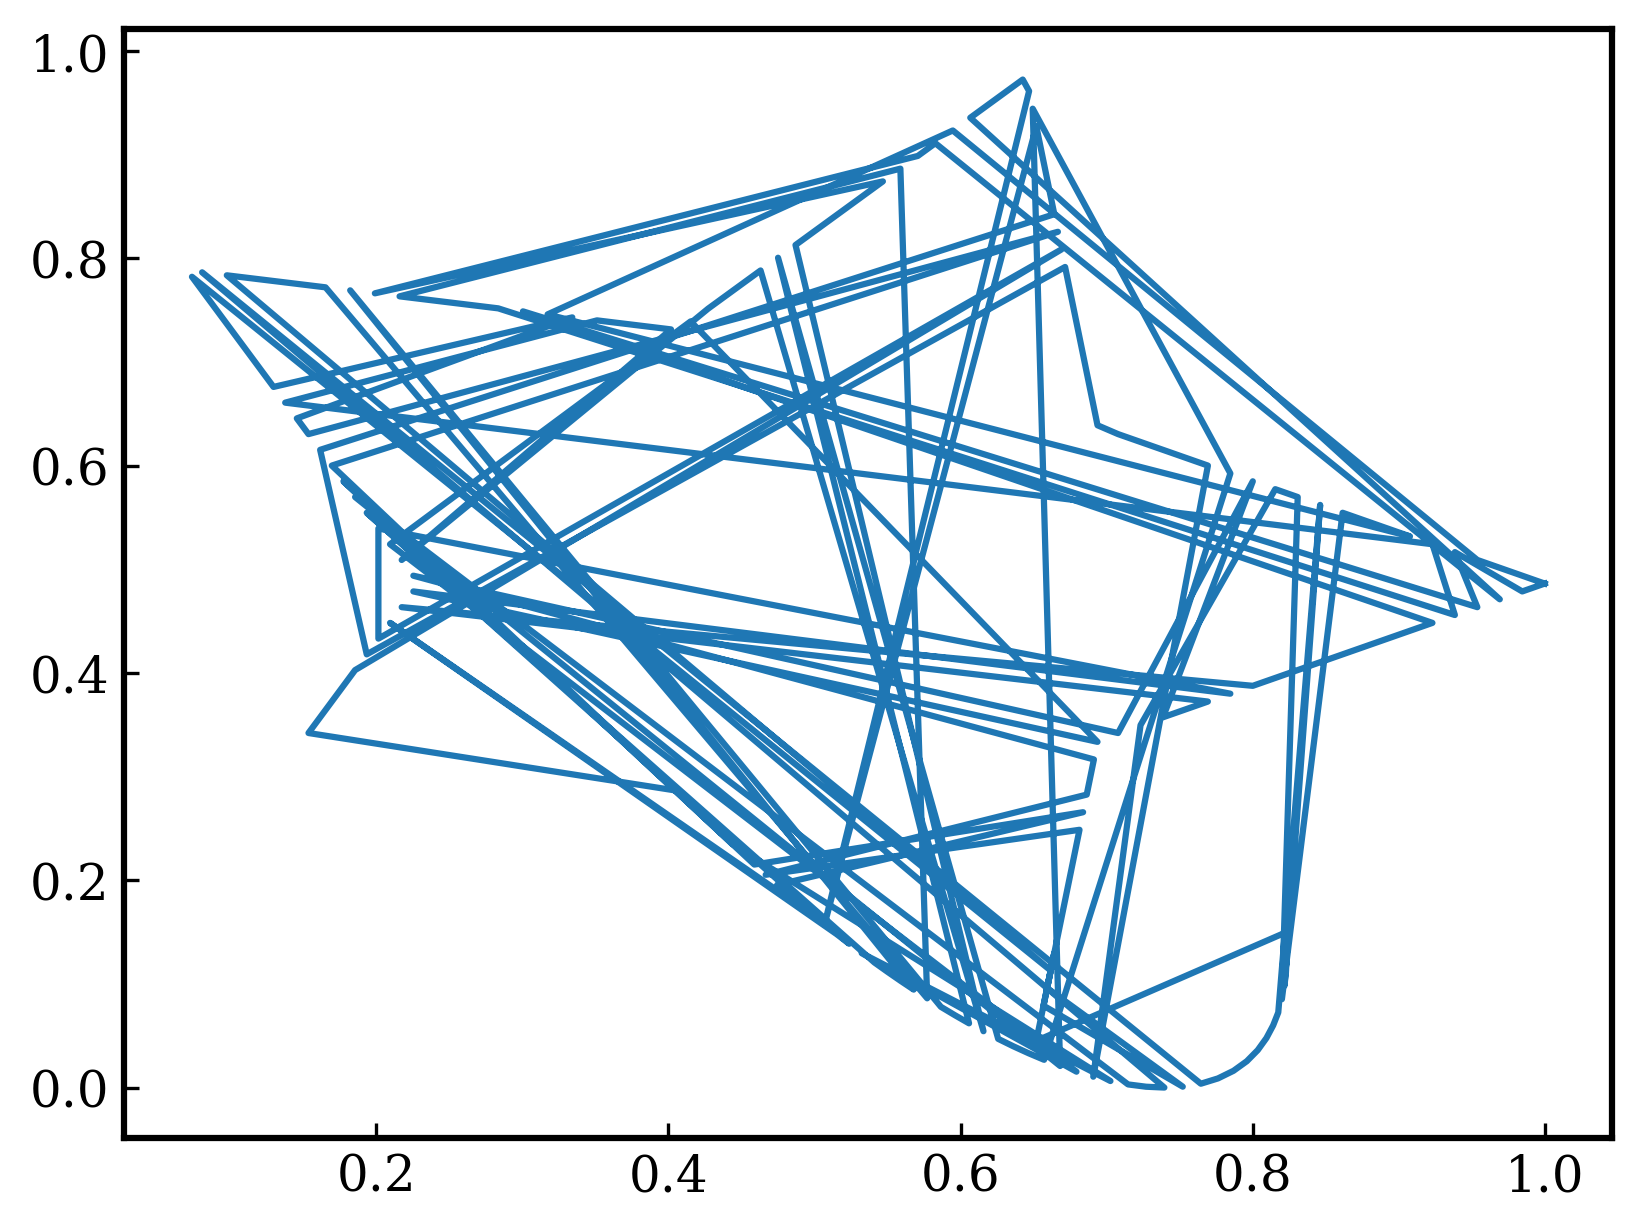

In [274]:
child = mutate(child,0.5)
plt.plot(child[:,0],child[:,1])